Dataset:
https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-
https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq


## Required Libraries

* numpy
* matplotlib
* seaborn
* pandas
* scikit
  

In [2]:
import warnings

# data handing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Prerpocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

# Feature selection
from sklearn.feature_selection import mutual_info_classif

# Classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

warnings.filterwarnings("ignore", category = RuntimeWarning)

### Read data

In [3]:
# Get data from a github vappiah@ repository 
file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/datasets/cancer_gene_expression.zip'
df=pd.read_csv(file_url)

In [4]:
df.head(7)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.000000,0.000000,0.000000,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.000000,0.000000,0.000000,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.000000,0.000000,0.000000,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.000000,0.000000,0.000000,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.000000,0.000000,0.000000,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
5,0.0,0.000000,0.0,3.285950,0.000000,0.000000,0.000000,0.0,0.000000,1.858419,...,11.262077,7.935401,6.686234,6.310078,11.629398,6.068034,10.156854,8.395337,2.304277,LUAD
6,0.0,0.927593,0.0,3.324983,0.537147,1.234624,1.234624,0.0,2.779008,3.563817,...,11.450423,8.470175,3.768682,5.909027,11.181531,8.171552,9.788190,5.526883,0.927593,KIRC


In [ ]:
label_path = "/mnt/c/Users/Elena Khramtsova/MyPythonProjects/BioProjects/RNA_Cancer_Prediction_ml/labels.csv"
mlabel_df = pd.read_csv(label_path)
label.show()

In [7]:
label_path = "/mnt/c/Users/Elena Khramtsova/MyPythonProjects/BioProjects/RNA_Cancer_Prediction_ml/Data/labels.csv"
label_df = pd.read_csv(label_path)
label_df.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


## Data Exploration & Cleaning

In [8]:
# check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature
#(rows, columns)
df.shape

(801, 8001)

In [9]:
#check first five columns
df.columns[0:5]

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')

In [10]:
# check the name of last columns
df.columns[-1]

'Cancer_Type'

In [11]:
#check for missing values
null_data=df.isnull().sum()
g=[i for i in null_data if i>0]

print('columns with missing valuess:%d'%len(g))


columns with missing valuess:0


In [12]:
# check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels
df['Cancer_Type'].value_counts()

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

* BRCA - Breast cancer a
* PRAD - Primary Prostate Cancer
* KIRC - Kidney renal papillary cell carcinoma
* COAD - colon adenocarcinoma/rectum carcinoma
* LUAD - Lung cancer 

<Axes: xlabel='Cancer_Type'>

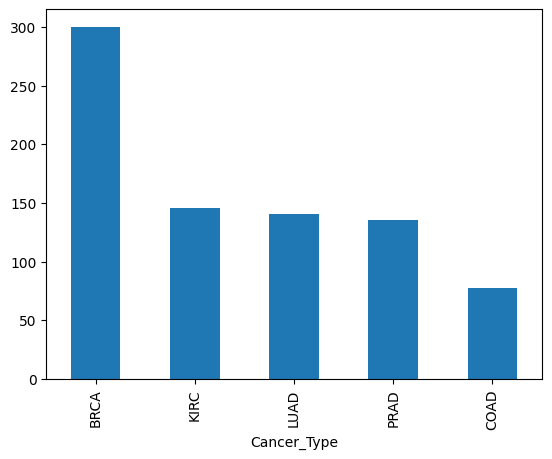

In [13]:
df['Cancer_Type'].value_counts().plot.bar()

## Data Preprocessing

In [14]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [15]:
X.shape

(801, 8000)

In [16]:
y.shape

(801,)

### Encode labels

In [17]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encode = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encode)

In [18]:
classes

array([0, 1, 2, 3, 4])

In [19]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

#### Data Splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)
df.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


#### Data Normalization

In [21]:
min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)

In [22]:
print(X_train_norm.shape)
print(y_train.shape)

(640, 8000)
(640,)


### Feature Seletion 

In [23]:
mi = mutual_info_classif(X_train_norm, y_train)

In [24]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features = 300
selected_scores_indices=np.argsort(mi)[::-1][0:n_features]

In [25]:
X_train_sel = X_train_norm[:,selected_scores_indices]
X_test_sel = X_test_norm[:,selected_scores_indices]

In [26]:
print(X_test_sel.shape)
print(X_train_sel.shape)

(161, 300)
(640, 300)


### Classification

Random forest works with multiclass and high dimensional data. Classification will involve training and testing of the model

#### Model Training 

In [42]:
rf = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
rf.fit(X_train_sel,y_train)
y_pred = rf.predict(X_test_sel)
pred_prob = rf.predict_proba(X_test_sel)

#### Model Evolution

After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model

accuracy
precision
recall
f1 score
confusion matrix
ROCrix
ROC Curve

In [43]:
#accuracy
accuracy = np.round(balanced_accuracy_score(y_test,y_pred),2)
print("accuracy:%0.4f"%accuracy)

#precision
precision = np.round(precision_score(y_test, y_pred, average='weighted'),4)
print('precission:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred, average='weighted'),4)
print('recall:%0.4f' %recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred, average='weighted'),4)
print('f1score:%0.4f'%f1score)

report = classification_report(y_test, y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9600
precission:0.9695
recall:0.9689
f1score:0.9687


classification report


              precision    recall  f1-score   support

        BRCA       0.95      0.98      0.97        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.92      0.92        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.97       161
   macro avg       0.97      0.96      0.96       161
weighted avg       0.97      0.97      0.97       161



In [44]:
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,59,0,0,1,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


Text(46.25, 0.5, 'True Labels')

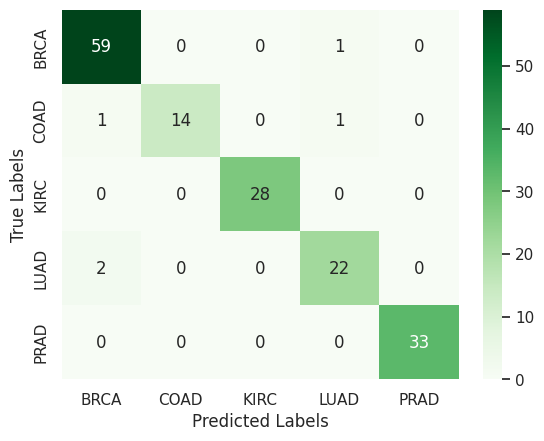

In [45]:
sns.heatmap(cm_df, annot=True, cmap="Greens")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [46]:
from sklearn import metrics

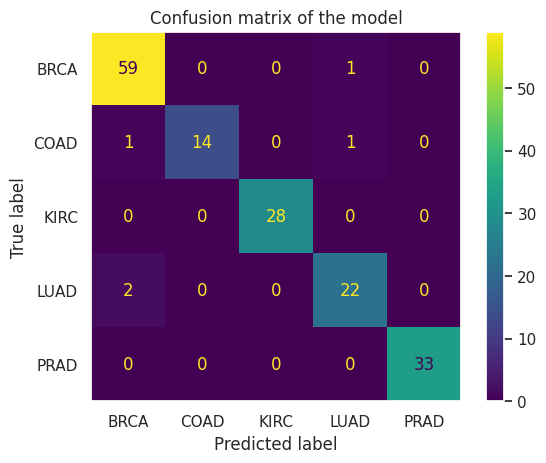

In [47]:
sns.set(palette= 'viridis', rc = {'axes.grid': False})
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=labels, cmap='viridis')
plt.title('Confusion matrix of the model')
plt.show()

In [48]:
print(y_pred.shape)
print(y_test.shape)
pred_prob.shape

(161,)
(161,)


(161, 5)

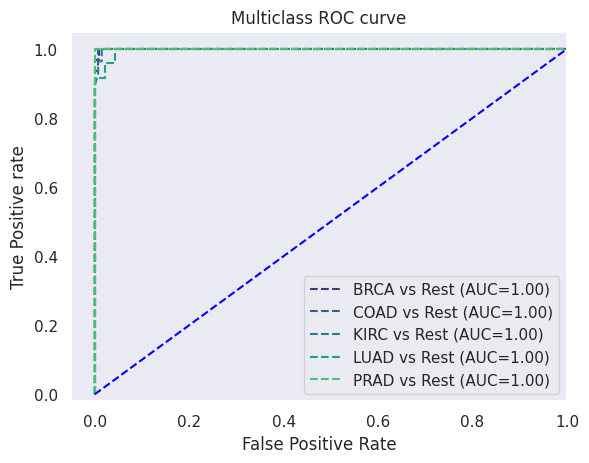

In [55]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob

y_test_binary = label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresholds ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binary[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.05,1])
plt.ylim([-0.02,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    